In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
def kMeanFun(col1, col2):
    kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
    numRows = trans_formed_min_max.shape[0]
    trainSize = round(numRows * 0.8) 
    # divide train and test dataset
    train = trans_formed_min_max.iloc[:trainSize, : ]
    test = trans_formed_min_max.iloc[trainSize : , :]
    x_cols = [col1]
    y_col = [col2]
    kmeans.fit(train[x_cols], train[y_col])
    print("The Lowest SSE Value is:\n\t"+str(kmeans.inertia_))
    print("\n----------------------------------------------------------\n")
    print("\n\nThe Location of the Centroid:\n\t"+str(kmeans.cluster_centers_))
    print("\n----------------------------------------------------------\n")
    print("\nIterations required to converge:\n\t"+str(kmeans.n_iter_))
    print("\n----------------------------------------------------------\n")
    print("\nLabels:\n\t"+str(kmeans.labels_[:5]))
    print("\n----------------------------------------------------------\n")   
    print("Ploting of the kMeans")
    sse1 = []
    kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(trans_formed_min_max)
        sse1.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.plot(sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    print("\n----------------------------------------------------------\n")
    print("Ploting of scatter plot")
    plt.scatter(trans_formed_min_max[col2], trans_formed_min_max[col1], c ="blue")
    # To show the plot
    plt.show()
    

In [ ]:
# kmeans for density and alcohol
kMeanFun('density', 'alcohol')

NameError: ignored

In [ ]:
X1 = df[['alcohol' , 'pH']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

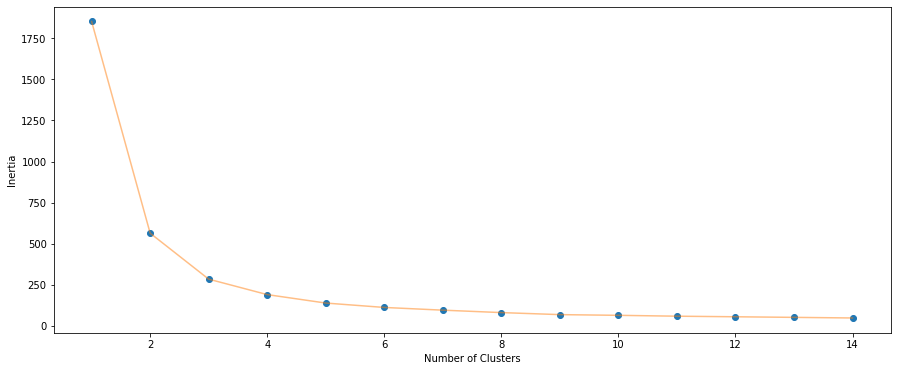

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

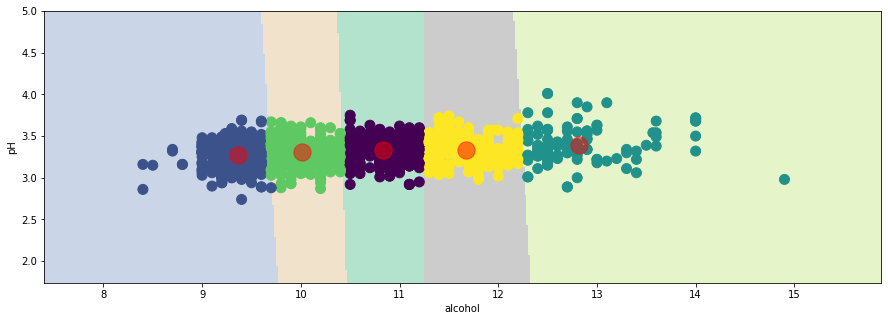

In [ ]:
plt.figure(1 , figsize = (15 , 5) )
plt.clf()
Z = Z.reshape(xx.shape) 
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'alcohol', y = 'pH', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('pH') , plt.xlabel('alcohol')
plt.show()